## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# we simply take the first value in the shape tuple (which refers to the rows)
print('number of rows:',df.shape[0])

number of rows: 294478


c. The number of unique users in the dataset.

In [4]:
# we can get the number of users by using the 'nunique' function, this gives us the number of unique values in the column.
print('number of unique users:', df.user_id.nunique())

number of unique users: 290584


d. The proportion of users converted.

In [5]:
# since the dataset is using 1 and 0, we can simply sum the whole 'converted' row which will give us
# total users who have converted. Afterwards, we can divide it by the total number of unique users to get our proportion 
# reason for the number of users is because we have multiple rows of the same users, so we want to not overcount.

print('proportion of converted users:',df.converted.sum() / df.user_id.nunique())

proportion of converted users: 0.121262698566


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# to check we use the query which helps us avoid having to make groups, and it is clean way of 
# filtering or comparing information.
# We get the number of matching, and we substract all the counts
# and exclude control and old_page to get the mismatch
numberOfMatch = df.query('group == "treatment" and landing_page == "new_page"').user_id.count()
numberOfMismatch = df.user_id.count() - numberOfMatch  - df.query('group == "control" and landing_page == "old_page"').user_id.count()
print('number of non-match:',numberOfMismatch)

number of non-match: 3893


f. Do any of the rows have missing values?

In [7]:
# summ all the nulls (true = 1, false = 0)
# seems like we have no missing values here
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# We can grab our two subsets that we want to remove from our experiment (since they're wrong)
treatmentMismatch = df.query('group == "treatment" and landing_page != "new_page"')
controlMismatch = df.query('group == "control" and landing_page != "old_page"')

# This is a neat trick to delete a subset of a dataframe, found in stackoverflow on this link:
# https://stackoverflow.com/questions/37313691/how-to-remove-a-pandas-dataframe-from-another-dataframe
# I simply concat the three dataframes, and drop the duplicates without keeping any of them.
df2 = pd.concat([df,treatmentMismatch,controlMismatch]).drop_duplicates(keep=False)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print('Number of Unique users in DF2:', df2.user_id.nunique())

Number of Unique users in DF2: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# since .duplicated() returns false and true values, we can use it as a filter for our dataframe to get 
# the duplicated user_id
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# we can drop the duplicate using drop_duplicates
df2.drop(2893, inplace=True)
# check for duplicated user_id (make sure that we have deleted one of the user IDs)
df2.user_id.duplicated().sum()

0

In [14]:
# Double checking so that we haven't removed both rows:
df2[df2['user_id'] == 773192].head()

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# Here we can take the number of converted and divide it by total converted samples we have
print('probability of converting:',df2.converted.sum() / df2.converted.count())

probability of converting: 0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# here we must sort by group, and repeat the steps above for that group
controlGroup = df2[df2['group'] == 'control']
print('probability of converting given individual was in control group:\n',
      controlGroup.converted.sum() / controlGroup.converted.count())

probability of converting given individual was in control group:
 0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# here we must sort by group, and repeat the steps above for that group
treatmentGroup = df2[df2['group'] == 'treatment']
print('probability of converting given individual was in control group:\n',
      treatmentGroup.converted.sum() / treatmentGroup.converted.count())

probability of converting given individual was in control group:
 0.118808065515


d. What is the probability that an individual received the new page?

In [18]:
print('probability of receiving the new page:'
,df2[df2['landing_page'] == 'new_page'].user_id.count() / df2.user_id.count())

probability of receiving the new page: 0.500061944223


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

What can be established when looking at the results above is that the probability of **control** for control group is *slightly* higher than the **treatment** group. A user in the **control group has a 12.04%** chance to convert, whereas a user in the **treatment group has an 11.88% chance** to convert. From this we may conclude that the control page is better purely due to statistics. However it is a very insignificant difference (0.16%) to decide a certain page will cause more impact.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Assuming that $P_{old}$ is better unless we prove $P_{new}$ to have an error rate better than a Type I error rate of 5%.

Null Hypothesis: The new page is no better, or even worse, than the old page.

Alternative Hypothesis:The new page is better than the old page. 

Therefore:

$H_0 : P_{new} \leq P_{old} \Longrightarrow P_{new} - P_{old} \leq 0$

$H_1 : P_{new} > P_{old} \Longrightarrow P_{new} - P_{old} > 0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
# since they're equal to the converted rate, we can simply:
p_new = df2.converted.sum() / df2.converted.count()
print('conversion rate of Pnew:',p_new)

conversion rate of Pnew: 0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
#this should be exactly equal to the above since they're both assumed to be equal (true success rates to the converted)
p_old = df2.converted.sum() / df2.converted.count()
print('conversion rate of Pold:',p_old)

conversion rate of Pold: 0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
# we take the length (rows) where the group is equal to treatment
treatmentGroup = df2[df2['group'] == 'treatment']
n_new = len(treatmentGroup)
print('number of users in treatment group:', n_new)

number of users in treatment group: 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
# we take the length (rows) where the group is equal to treatment
controlGroup = df2[df2['group'] == 'control']
n_old = len(controlGroup)
print('number of users in control group:', n_old)

number of users in control group: 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# as we learned in hypothesis section:
new_page_converted = treatmentGroup.sample(n_new, replace = True)
new_page_converted = new_page_converted['converted']

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
# similar to the above but with n_old
old_page_converted = controlGroup.sample(n_old, replace = True)
old_page_converted =old_page_converted['converted']

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
# pNew will be the mean of nNew, and pOld will be the mean of nOld
pSimulationDifference = new_page_converted.mean() - old_page_converted.mean()
print('pDifference:', pSimulationDifference)

pDifference: -0.00201820428229


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
p_diffs = []

for _ in range(10000):
    # sampling and getting mean of new page
    new_page_converted = treatmentGroup.sample(n_new, replace = True)
    new_page_converted_mean = new_page_converted['converted'].mean()
    
    # sampling and getting mean of new page
    old_page_converted = controlGroup.sample(n_old, replace = True)
    old_page_converted_mean = old_page_converted['converted'].mean()
    
    # calculate the difference 
    difference = new_page_converted_mean - old_page_converted_mean
    p_diffs.append(difference)

p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

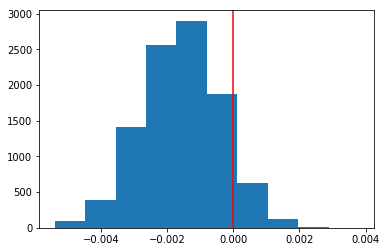

In [27]:
# here we plot the histogram, and followed by a vertical line where x = 0
# x = 0 because the hypothesis states: less or equal to 0
plt.hist(p_diffs)
plt.axvline(x=0, color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
actualDifference = treatmentGroup['converted'].mean() - controlGroup['converted'].mean()
print('Proportion where p_diffs is greater than actual difference:\n',(p_diffs > actualDifference).mean())

Proportion where p_diffs is greater than actual difference:
 0.5055


In [29]:
# Checking how often it is under 0 (our null hypothesis)
(p_diffs < 0).mean()

0.90800000000000003

In [30]:
# We can also create a distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

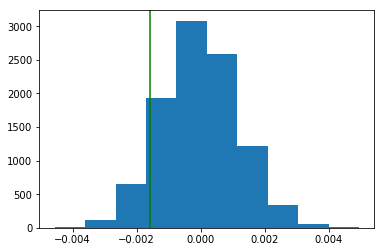

In [31]:
#let's plot it 
plt.hist(null_vals);

# checking where our actualDifference lands (how likely for it to occur)
plt.axvline(x = actualDifference, color = 'green');

In [32]:
# let's calculate the p value
p_value = (null_vals > actualDifference).mean()
p_value

0.9052

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In the previous section, we calculated the **p-value** which equaled to **0.9062 (90.62%)**.

The p-value is the probablity of our null hypothesis is true. In our case, we're observing the conversion difference is less than or equal to zero.

since our p-value is large it suggets that we wouldn't move away from the null hypothesis (rather, we use it!).

Also, our p-value is a lot larger than 5% which is our Type I error rate.

From this we **fail to reject the null hypothesis**, meaning we cannot conclude that the new page converts more users than the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and group == "control"').user_id.count()
convert_new = df2.query('converted == 1 and group == "treatment"').user_id.count()
n_old = df2.query('group=="control"').user_id.count()
n_new = df2.query('group=="treatment"').user_id.count()

# printing the results
convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [34]:
# count = [convert_old,convert_new], and nubs = [n_old, n_new]
# the alternative set to smaller since we want to see if null_vals < actual difference
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new],alternative='smaller') 
print('z_score is:',z_score, '\np_value is:', p_value)

z_score is: 1.31092419842 
p_value is: 0.905058312759


In [35]:
from scipy.stats import norm
# a useful link for calculating the critical value with python
# https://www.statology.org/z-critical-value-python/
# checking the critical z-score value for a 5% type I error
# since we're testing alternative where pnew - pold > 0 (greater than)
# that means we use a right-tail test

critical_zscore_value = norm.ppf(1 - (0.05))
print('critical z-score value:', critical_zscore_value)

critical z-score value: 1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The **z-score** of **1.311** means that we are 1 positive standard deviation point above the mean. (when z-score is 0 that means it's on the mean). 

Checking the critical z-score value (1.645), if the z-score is greater than the critical value we can reject the null hypothesis. However, in our case our z_score is under the critical value therefore **we fail to reject the null hypothesis**.

The **p-value** of **0.9051 (90.51%)** is almost identical to the one we calculated in part 'j'. Which yields the same answer of **failing to reject the null hypothesis**.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

I will be using **Logistic Regression**, the reason is that it can be used for **categorical** data

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
# creating our intercept
df2['intercept'] = 1

# creating our dummies
df2[['ab_page','treatment']] = pd.get_dummies(df2['group'])

# we drop a column (not necessary and to get a full rank)
df2.drop('treatment',axis = 1)

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [37]:
# we use Logit for logistic regression, first paramater is y, second is x
log_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

# fitting our model
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-28 21:15 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1457  0.0000  -2.0197  -1.9879
ab_page       0.0150    0.0114     1.3109  0.1899  -0.0074   0.0374
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

One of the main differences we have to the ones we did in Part II is that the hypothesis carried out by the regression model is a **two-tail** test where the use of not equal and equal (to get the two tails)

The Null and Hypothesis in the regression model: $$H_0: P_{new} - P_{old} = 0$$ $$H_1: P_{new} - P_{old} \neq 0$$


Whereas in Part II:
$$H_0 :P_{new} - P_{old} \leq 0$$

$$H_1 :  P_{new} - P_{old} > 0$$

**Also, our p-value that we found above is 0.19. Which means that we also Fail to reject the null since our Type I error is 0.05 and in order to reject we need to have it less than 0.05.**

**The reason the p-value is different is because it's a different hypothesis therefore it lead to a different p-value (two-tail vs one-tail)**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Of course adding additional factors will influence the regression model and the results. For example, adding in an extra variable such as "user bought a course previously" adding such features might produce bias due to factors like change aversion and novelty effect. However, adding more will give a nice features will help identify outliers and anomalies, and overall improving the model.**

**Some disadvantages, other than change aversion and novelty effect, are the possibility of leading to overfitted model to our testing data. Another classic issue would be Simpson's Paradox, having a lot of features might make it tough to find the right grouping of data.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
# loading the country data
df3 = pd.read_csv('countries.csv')

df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [40]:
# joining df3 and df2
df4 = df2.join(df3.set_index('user_id'), on = 'user_id')

df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,treatment,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US


In [41]:
# checking df4 for duplicated user ids
df4.user_id.duplicated().sum()

0

In [42]:
# check how many countries there are to create the names for the dummy variables
df3.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [43]:
#find the country with the most value to use as a baseline
# source for finding good baseline: https://www.theanalysisfactor.com/strategies-dummy-coding/
df3.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [44]:
# creating the dummy variables:
df4[['UK', 'US', 'CA']] = pd.get_dummies(df4['country'])

# like we said above, US is going to be our baseline since it has the largest count
df4.drop(['country','US'],axis = 1, inplace = True)
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,treatment,UK,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1


In [45]:
# creating our logistic regression model
# adding intercept
df4['intercept'] = 1

# create the model
log_mod_df4 = sm.Logit(df4['converted'], df4[['intercept','UK','CA']])

# fit the model
results_df4 = log_mod_df4.fit()

results_df4.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-28 21:15 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9868    0.0114  -174.1736  0.0000  -2.0092  -1.9645
UK           -0.0507    0.0284    -1.7863  0.0740  -0.1064   0.0049
CA           -0.0099    0.0133    -0.7458  0.4558  -0.0360   0.0161
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [74]:
# creating df5 for the new interaction
df5 = df2.join(df3.set_index('user_id'), on = 'user_id')

# creating the dummy variables:
df5[['UK', 'US', 'CA']] = pd.get_dummies(df5['country'])

# like we said above, US is going to be our baseline since it has the largest count
df5.drop(['country'],axis = 1, inplace = True)


In [75]:
# to get the interaction between page and country, we multiply the country table by the page table:
df5['US_ab'] = df5['US'] * df5['ab_page']
df5['UK_ab'] = df5['UK'] * df5['ab_page']
df5['CA_ab'] = df5['CA'] * df5['ab_page']

df5.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,treatment,UK,US,CA,US_ab,UK_ab,CA_ab
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,0,0,1,0,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,0,0,1,0,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,0,1,0,0,1


In [79]:
# let's re-create our model
log_mod_interaction = sm.Logit(df5['converted'], df5[['intercept','UK','CA','US_ab','UK_ab','CA_ab']])
results_interaction = log_mod_interaction.fit()
results_interaction.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-28 21:48 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9814    0.0161  -122.8600  0.0000  -2.0130  -1.9498
UK           -0.0901    0.0405    -2.2252  0.0261  -0.1694  -0.0107
CA           -0.0257    0.0188    -1.3634  0.1728  -0.0625   0.0112
US_ab        -0.0108    0.0228    -0.4749  0.6349  -0.0555   0.0339
UK_ab         0.0674    0.0520     1.2967  0.1947  -0.0345   0.1694
CA_ab         0.0206    0.0137     1.5052  0.1323  -0.0062   0.0473
==================================================================

"""

In [80]:
# to get a better meaning let's grab the exponential and inverse of the results:
np.exp(results_interaction.params)

intercept    0.137878
UK           0.913871
CA           0.974672
US_ab        0.989224
UK_ab        1.069775
CA_ab        1.020776
dtype: float64

In [81]:
# let's grab the reciprocal
1 / np.exp(results_interaction.params)

intercept    7.252800
UK           1.094247
CA           1.025986
US_ab        1.010893
UK_ab        0.934776
CA_ab        0.979646
dtype: float64

### **Conclusion**

To start, all of our new values US_ab, UK_ab, , CA_ab, and CA all fail to reject our null hypothesis due to the P-value. Interestingly adding more features has loweded the P-value of the UK by approx 0.05%. Which has set it in the region of accepting the alternative hypothesis, however, that is not enough to do so.

Looking at the exponential and reciprocal, we can see that that the countries have a very equal chance to convert a user (which doesn't give us any good leads). Therefore, we **fail to reject our null hypothesis**


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [82]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0